# 第4章　TensorFlow编程基础

   本章主要介绍TensorFlow的基础语法及功能函数。学完本章后，TensorFlow代码对读者来说将不再陌生，读者可以很轻易看懂网上和书中例子的代码，并可以尝试写一些简单的模型或算法。

   学习一个开发环境，应先从其内部入手，这样会起到事半功倍的效果。本章先从编程模型开始了解其运行机制，然后再介绍TensorFlow常用操作及功能函数，最后是共享变量、图和分布式部署。
   
# 4.1　编程模型

   TensorFlow的命名来源于本身的运行原理。Tensor（张量）意味着N维数组，Flow（流）意味着基于数据流图的计算。TensorFlow是张量从图像的一端流动到另一端的计算过程，这也是TensorFlow的编程模型。

### 4.1.1　了解模型的运行机制

   TensorFlow的运行机制属于“定义”与“运行”相分离。从操作层面可以抽象成两种：模型构建和模型运行。

   在模型构建过程中，需要先了解几个概念，如表4-1所示。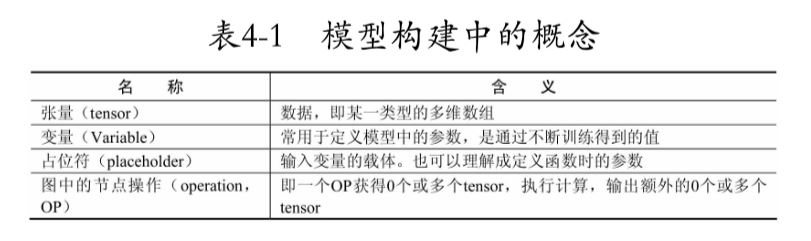
   
   表4-1中定义的内容都是在一个叫做“图”的容器中完成的。关于“图”，有以下几点需要理解。
   
   ·一个“图”代表一个计算任务。
   
   ·在模型运行的环节中，“图”会在会话（session）里被启动。
   
   ·session将图的OP分发到如CPU或GPU之类的设备上，同时提供执行OP的方法。这些方法执行后，将产生的tensor返回。在Python语言中，返回的tensor是numpy ndarray对象；在C和C++语言中，返回的tensor是TensorFlow：：Tensor实例。
   
   如图4-1所示为session与图的工作关系。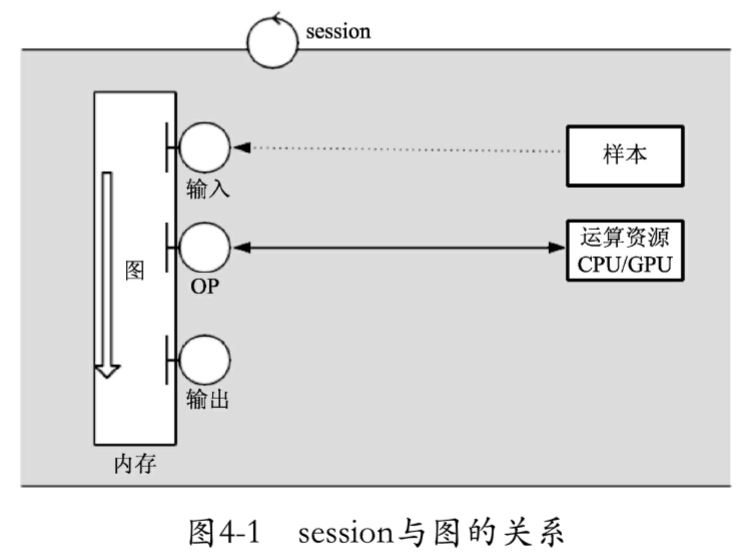
   
   在实际环境中，这种运行情况会有3种应用场景，分别是训练场景、测试场景与使用场景。在训练场景下图的运行方式与其他两种不同，具体介绍如下。
   
（1）训练场景：是实现模型从无到有的过程，通过对样本的学习训练，调整学习参数，形成最终的模型。其过程是将给定的样本和标签作为输入节点，通过大量的循环迭代，将图中的正向运算（从输入的样本通过OP运算得到输出的方向）得到的输出值，再进行反向运算（从输出到输入的方向），以更新模型中的学习参数，最终使模型产生的正向结果最大化地接近样本标签。这样就得到了一个可以拟合样本规律的模型。

（2）测试场景和使用场景：测试场景是利用图的正向运算得到的结果与真实值进行比较的差别；使用场景也是利用图的正向运算得到结果，并直接使用。所以二者的运算过程是一样的。对于该场景下的模型与正常编程用到的函数特别相似。在函数中，可以分为实参、形参、函数体与返回值。同样在模型中，实参就是输入的样本，形参就是占位符，运算过程就相当于函数体，得到的结果相当于返回值。

   另外，session与图的交互过程中还定义了以下两种数据的流向机制。
   
   ·注入机制（feed）：通过占位符向模式中传入数据。
   
   ·取回机制（fetch）：从模式中得到结果。
   
## 网络各种版本解释汇集：

### python与tensrflow

Python 和 Tensorflow 之间的联系，可以类比 Java 和 HTML 之间的关系。Java 是一种全功能的编程语言，可以实现各种出色的效果。HTML 是用于表示某种类型的实用计算抽象（这里指的是可由 Web 浏览器呈现的内容）的框架。Java 在交互式网页中的作用是组装浏览器看到的 HTML 对象，然后在需要时通过将其更新为新的 HTML 来与其交互。

与 HTML 类似，Tensorflow 是用于表示某种类型的计算抽象（称为“计算图”）的框架。当我们用 Python 操作 Tensorflow 时，我们用 Python 代码做的第一件事是组装计算图。之后我们的第二个任务就是与它进行交互（使用 Tensorflow 的“会话”）。但重要的是，要记住计算图不在变量内部，它处在全局命名空间内。莎士比亚曾经说过：“所有的 RAM 都是一个阶段，所有的变量都只不过是指针。”

### Tensorflow基本概念

### 官网上的动态解释图
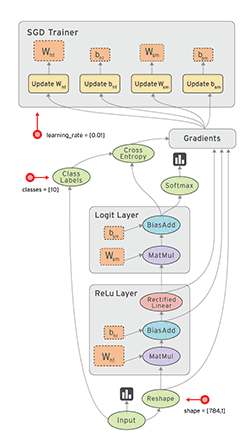

节点【nodes】： 图中的各种形状的方块，表示的是某种数学操作【op】

线【edges】： 表示节点间相互联系的多维数据数组，在tensorflow中，称为张量【tensor】。
                
重塑节点【Reshape】：前面说了，节点表示计算，所以reshape是一个计算节点，用于进行矩阵的行数、列数、维度的调整。经常用这个节点进行降低维度计算

激活函数层【ReLULayer】：实现了对输入数据的非负处理，将小于零的数据进行了截断

逻辑层【Logit layer】: 实现逻辑回归，实现分类器计算

计算梯度【Gradients】:计算梯度

梯度下降训练【SGD Trains】：进行梯度下降训练优化

Tensorflow是一个编程系统，使用图（graphs）来表示计算任务，图（graphs）中的节点称之为op（operation），一个op获得0个或者多个Tensor，执行计算，产生0个或多个Tensor，Tensor看作是一个n维的数组或列表。图必须在会话（Session）里被启动。

流图中的每个节点（OP）都代表一个操作。 这样做的好处是：任何计算都能表示成若干个节点的组合。

机器模型在训练时，会有很多次迭代（比如10000次）。而每一次迭代，上图的演示就是一次迭代的过程。训练10000次，这个流图就要“流动”10000次。

### 基本概念：

1、graphs

使用图（graphs）来表示计算任务，用于搭建神经网络的计算过程，但其只搭建网络，不计算。
    
2、Session

在被称之为会话（Session）的上下文（context）中执行图。

会话的作用是处理内存分配和优化，使我们能够实际执行由图形指定的计算。可以将计算图想象为我们想要执行的计算的“模板”：它列出了所有的步骤。为了使用这个图表，我们还需要发起一个会话，它使我们能够实际地完成任务。例如，遍历模板的所有节点来分配一组用于存储计算输出的存储器。为了使用 Tensorflow 进行各种计算，我们既需要图也需要会话。

会话包含一个指向全局图的指针，该指针通过指向所有节点的指针不断更新。这意味着在创建节点之前还是之后创建会话都无所谓。

创建会话对象后，可以使用 sess.run(node) 返回节点的值，并且 Tensorflow 将执行确定该值所需的所有计算。

这种通过对话跑流图的方式, 清晰地隔离变量, 利用已有的CPU, GPU等资源(Tensorflow内部有一套placement算法, 安排哪些节点操作应该跑在哪些CPU或GPU上)。

3、tensor

Tensor就是流图中的边，数据要“流”过边，就需要适合这个”边”, 或者说”管道”大小。比如这个边只能有维数为5的数据通过, 那么这个Tensor就是5维度固定。这样设计的好处是, 维数固定, 运行效率就高. 而且, 在整个流图中, 也有复用的可能。

使用张量（tensor）表示数据，用“阶”表示张量的维度。关于这一点需要展开一下

   0阶张量称为标量，表示单独的一个数
   
   1阶张量称为向量， 表示一个一维数组
   
   2阶张量称为矩阵，表示一个二维数组
   
   ……
   
   张量是几阶的可以通过张量右边的方括号数来判断。例如 t = [ [ [    ] ] ]，显然这个为3阶。
   
4、Variable

通过变量（Variable）维护状态。

同一个值在流图的训练过程中会不断地更新, 这个值就应该作为变量。比如, 梯度下降中的步长, 集成学习中的权重, 等等。经常要处理的变量, 在Tensorflow内部结构也比较特殊。

了解：当一个变量定义时, 其实有三个节点生成。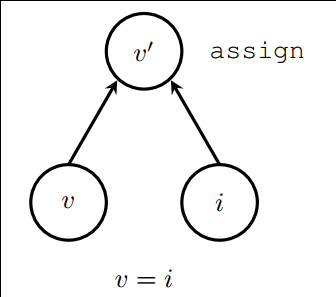

v: 内存中一块自由的缓存变量

i: 用来初始化v的初始值

v’: 一个assign操作把i的值赋给v

这样, v的值就不封闭在内存中, 而是通过v’提供给流图使用了。

5、session与graph的交互过程

使用feed和fetch可以为任意的操作赋值或者从其中获取数据。下面的工作流程中会介绍。

### tensorflow基本工作流程

tensorflow使用数据流图(data flow graph)进行数值计算的软件框架。

数据流图是描述有向图中的数值计算过程。 

有向图中，节点通常代表数学运算，边表示节点之间的某种联系，它负责传输多维数据(Tensors)。 

下图为比较好理解的tensorflow工作流程图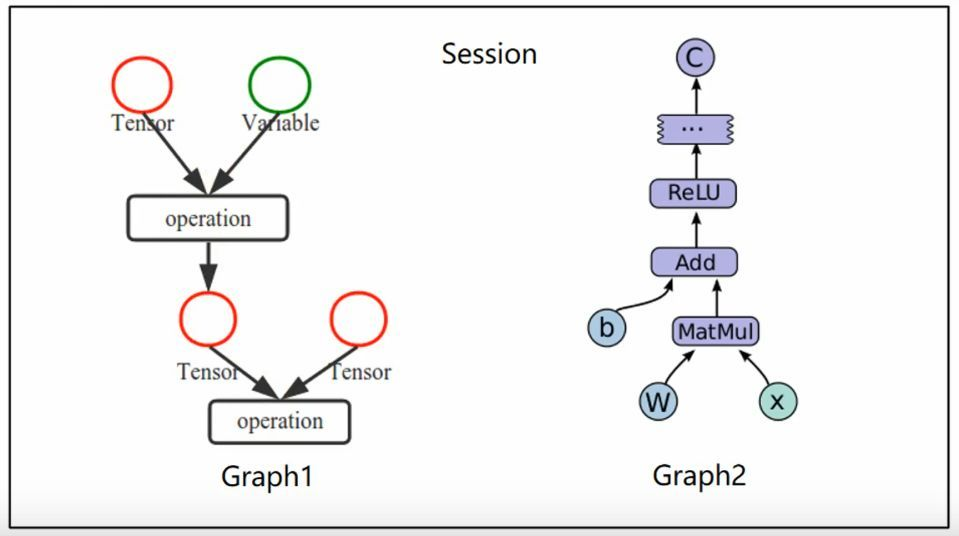

这个图呢（graph）代表一个计算的过程，并且要在会话（session）中执行，可以看到图中有很多op，你可以看做一个加法或者减法运算等。而这些运算要把tensor或者变量（variable）放进来操作。比如左图（Graph1）最上边一个tensor和一个variable传入op进行加法操作，操作后再得到一个tensor，数据向下流动，和另一个tensor一起流入最下面的节点op，进行加法操作以后得到最终的结果。

右图（Graph2）相当于一个实例，权值w和变量x进行乘法操作以后，再加上偏置b，再经过ReLU激活函数，得到输出，向上流动。

该链接为tensorflow技术框架解析https://blog.csdn.net/qq_30262201/article/details/79106198

下面通过实例逐个演示session在各种情况下的用法。先从session的建立开始，接着演示session与图的交互机制，最后演示如何在session中指定GPU运算资源。

## 4.1.2　实例5：编写hello world程序演示session的使用

   下面先从一个hello world开始来理解session的作用。

## 实例描述

   建立一个session，在session中输出hello，TensorFlow。


In [2]:
#代码4-1　sessionhello
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')   #定义一个常量
sess = tf.Session()                        #建立一个session
print (sess.run(hello))                    #通过session里面run
sess.close()                               #关闭session

b'Hello, TensorFlow!'


   tf.constant定义的是一个常量，hello的内容只有在session的run内才可以返回。

   可以试着在2和3行之间加入print（hello）看一下效果，这时并不能输出hello的内容。

   接下来换种写法，使用with语法来开启session。
   
## 4.1.3　实例6：演示with session的使用

with session的用法是最常见的，它沿用了Python中with的语法，即当程序结束后会自动关闭session，而不需要再去写close。代码如下。

## 实例描述

使用with session方法建立session，并在session中计算两个变量（3和4）的相加与相乘值。

In [3]:
#代码4-2　with session
import tensorflow as tf
a = tf.constant(3)                    #定义常量3
b = tf.constant(4)                   #定义常量4
with tf.Session() as sess:          #建立session
    print ("相加: %i" % sess.run(a+b))
    print( "相乘: %i" % sess.run(a*b))

相加: 7
相乘: 12


## 4.1.4　实例7：演示注入机制

扩展上面代码：使用注入机制，将具体的实参注入到相应的placeholder中。feed只在调用它的方法内有效，方法结束后feed就会消失。

## 实例描述

定义占位符，使用feed机制将具体数值（3和4）通过占位符传入，并进行相加和相乘运算。

In [3]:
#代码4-3　withsessionfeed
import tensorflow as tf
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)                  #a与b相乘
with tf.Session() as sess:
#计算具体数值
     print ("相加: %i" % sess.run(add, feed_dict={a: 3, b: 4}))
     print ("相乘: %i" % sess.run(mul, feed_dict={a: 3, b: 4}))

相加: 7
相乘: 12


标记的方法是：使用tf.placeholder为这些操作创建占位符，然后使用feed_dict把具体的值放到占位符里。

注意： 关于feed中的feed_dict还有其他的方法，如update等，在后面的例子中用到时还会介绍，这里只是介绍最常用的方法。

## 4.1.5　建立session 的其他方法

建立session还有以下两种方式。

·交互式session方式：一般在Jupyter环境下使用较多，具体用法与前面的with session类似。

代码如下：

In [4]:
sess = tf.InteractiveSession()

·使用Supervisor方式：该方式会更高级一些，使用起来也更加复杂，可以自动来管理session中的具体任务，例如，载入/载出检查点文件、写入TensorBoard等，另外该方法还支持分布式训练的部署（在本书的后面会有介绍）。

## 4.1.6　实例8：使用注入机制获取节点

在实例7中，其实还可以一次将多个节点取出来。例如，在最后一句可以加上以下代码（见代码4-3）：

## 实例描述

使用fetch机制将定义在图中的节点数值算出来。

In [8]:
#代码4-3　withsessionfeed（续）
mul = tf.multiply(a, b)
with tf.Session() as sess:
    #将op运算通过run打印出来
    print ("相加: %i" % sess.run(add, feed_dict={a: 3,b: 4}))
    #将add节点打印出来
    print ("相乘: %i" % sess.run(mul, feed_dict={a: 3,b: 4}))
    print (sess.run([mul,add],feed_dict={a: 3,b: 4}))

相加: 7
相乘: 12
[12, 7]


## 4.1.7　指定GPU运算

如果下载的是GPU版本，在运行过程中TensorFlow能自动检测。如果检测到GPU，TensorFlow会尽可能地利用找到的第一个GPU来执行操作。

如果机器上有超过一个可用的GPU，除第一个之外的其他GPU默认是不参与计算的。为了让TensorFlow使用这些GPU，必须将OP明确指派给它们执行。with……device语句能用来指派特定的CPU或GPU执行操作：

In [20]:
with tf.Session() as sess:
    with tf.device("/cpu:0"):
        a = tf.placeholder(tf.int16)
        b = tf.placeholder(tf.int16)
        add = tf.add(a, b)

设备用字符串进行标识。目前支持的设备包括以下几种。

·cpu：0：机器的CPU。

·gpu：0：机器的第一个GPU，如果有的话。

·gpu：1：机器的第二个GPU，依此类推。类似的还有通过tf.ConfigProto来构建一个config，在config中指定相关的GPU，并且在session中传入参数config="自己创建的config"来指定GPU操作。

#tf.ConfigProto函数的参数如下。

·log_device_placement=True：是否打印设备分配日志。

·allow_soft_placement=True：如果指定的设备不存在，允许TF自动分配设备。

使用举例：

config = tf.ConfigProto(log_device_placement=True,allow_soft_placement=Ture)

session = tf.Session(config=config, ...)

## 4.1.8　设置GPU使用资源

上文的tf.ConfigProto函数生成config之后，还可以设置其属性来分配GPU的运算资源。如下代码就是按需分配的意思：

config.gpu_options.allow_growth = True

使用allow_growth option，刚开始会分配少量的GPU容量，然后按需慢慢地增加，由于不会释放内存，所以会导致碎片。

同样，上述代码也可以放在config创建的时指定，例如：

gpu_options = tf.GPUOptions(allow_growth=True)
config=tf.ConfigProto(gpu_options=gpu_options)

以下代码还可以给GPU分配固定大小的计算资源。

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)

代表分配给tensorflow的GPU显存大小为：GPU实际显存*0.7。

（options = tf.GPUOptions(per_process_g该方法暂时用不到，读者在以后遇到这样的代码时明白是什么意思即可）

## 4.1.9　保存和载入模型的方法介绍

一般而言，训练好的模型都需要保存。下面将举例演示如何保存和载入模型。

## 1．保存模型

首先需要建立一个saver，然后在session中通过saver的save即可将模型保存起来。代码如下：

之前是各种构建模型graph的操作（矩阵相乘，sigmoid等）
saver = tf.train.Saver()                           #生成save

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())           #先对模型初始化
    #然后将数据丢入模型进行训练
    #训练完以后，使用saver.save 来保存
    saver.save(sess, "save_path/file_name")
    #file_name如果不存在，会自动创建

## 2．载入模型

将模型保存好以后，载入也比较方便。在session中通过调用saver的restore（）函数，会从指定的路径找到模型文件，并覆盖到相关参数中。代码如下：

saver = tf.train.Saver()

with tf.Session() as sess:
    #参数可以进行初始化，也可不进行初始化。即使初始化了，初始化的值也会被restore的值给覆盖
    sess.run(tf.global_variables_initializer()) 
    saver.restore(sess,"save_path/file_name")   #会将已经保存的变量值restore到变量中

## 4.1.10 实例9：保存/载入线性回归模型

## 实例描述

在代码“3-1线性回归.py”文件的基础上，添加模型的保存及载入功能。

通过扩展上一章的例子，来演示一下模型的保存及载入。在代码“3-1线性回归.py”文件中生成模拟数据之后，加入对图变量的重置，在session创建之前定义saver及保存路径，在session中训练结束后，保存模型。

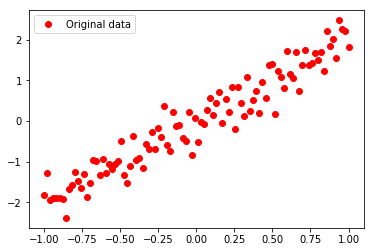

Epoch: 1 cost= 2.6111429 W= [-0.41139418] b= [0.7172833]
Epoch: 3 cost= 0.30803916 W= [1.3740492] b= [0.23921584]
Epoch: 5 cost= 0.12615 W= [1.858237] b= [0.05689595]
Epoch: 7 cost= 0.1158405 W= [1.9838125] b= [0.00876564]
Epoch: 9 cost= 0.11567367 W= [2.016289] b= [-0.00369607]
Epoch: 11 cost= 0.11579779 W= [2.0246856] b= [-0.00691817]
Epoch: 13 cost= 0.11584104 W= [2.0268557] b= [-0.00775104]
Epoch: 15 cost= 0.115853004 W= [2.0274189] b= [-0.00796704]
Epoch: 17 cost= 0.11585615 W= [2.0275643] b= [-0.00802288]
Epoch: 19 cost= 0.115856975 W= [2.0276022] b= [-0.00803743]
 Finished!
cost= 0.115857124 W= [2.027609] b= [-0.00804012]


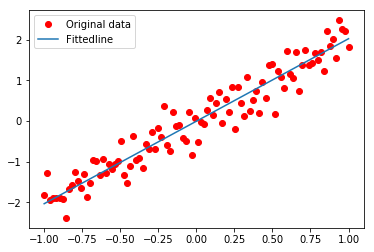

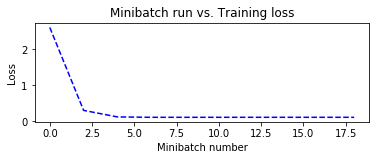

 Finished!
cost= 0.115857124 W= [2.027609] b= [-0.00804012]


In [3]:
#代码4-4　线性回归模型保存及载入
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#模拟数据
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3                # y=2x，但是加入了噪声
#显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(X, W)+ b
#反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  #梯度下降

#重置图
#tf.reset_default_graph()

#初始话等操作
#初始化所有变量
init = tf.global_variables_initializer()
#定义参数
training_epochs = 20
display_step = 2
 
saver = tf.train.Saver()                            #生成saver
savedir = "log/"                                    #生成模型的路径
#启动session
with tf.Session() as sess:
    sess.run(init)
    #在这里添加Sess中的训练代码
    plotdata = { "batchsize":[], "loss":[] }             #存放批次值和损失值
    #向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print ("Epoch:", epoch+1,"cost=", loss,"W=", sess.run(W),"b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
                    
    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b))
## 训练模型可视化
#图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    
    plt.show()
    print (" Finished!")
    saver.save(sess,savedir+"linermodel. cpkt")
    print ("cost=",sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

运行上面代码可以看到，在代码的同级目录下log文件夹里生成了几个文件，下图所示。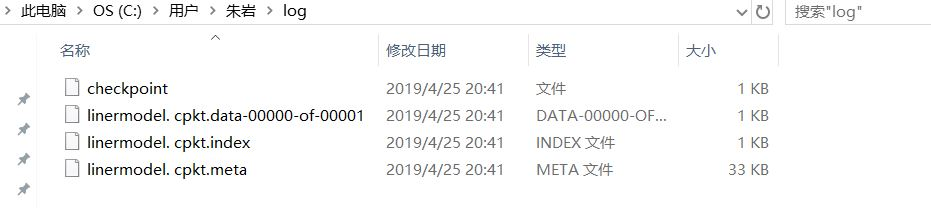
再重启一个session，并命名为sess2，在代码里通过使用saver的restore函数将模型载入。

为了测试效果，可以将前面一个session注释掉，运行之后可以看到如下输出：

In [5]:
#代码4-4　线性回归模型保存及载入（续） 
with tf.Session()as sess2: 
    sess2.run(tf.global_variables_initializer()) 
    saver.restore(sess2,savedir+"linermodel. cpkt") 
    print ("x=0.2，z=", sess2.run(z, feed_dict={X: 0.2}))

INFO:tensorflow:Restoring parameters from log/linermodel. cpkt
x=0.2，z= [0.3974817]


表明模型已经成功载入，并计算出正确的值了。

## 4.1.11　实例10：分析模型内容，演示模型的其他保存方法

下面再来详细介绍下关于模型保存的其他细节。

## 实例描述

将4.1.10节生成的模型里面的内容打印出来，观察其存放的具体数据方式。同时演示如何将指定内容保存到模型文件中。

## 1．模型内容

虽然模型已经保存了，但是仍然对我们不透明。下面通过编写代码将模型里的内容打印出来，看看到底保存了哪些东西，都是什么样的。

In [51]:
#代码4-5　模型内容
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
savedir = "log/"
print_tensors_in_checkpoint_file(savedir+"linermodel.cpkt",None,True)

tensor_name:  bias
1.0
tensor_name:  weight
2.0


可以看出，tensor_name:后面跟的就是创建的变量名，接着是它的数值。

## 2 .  保存模型的其他方法

前面的例子中Saver的创建比较简单，其实tf.train.Saver函数里面还可以放参数来实现更高级的功能，可以指定存储变量名字与变量的对应关系。可以写成这样：

saver = tf.train.Saver({'weight':W, 'bias':b})

代表将w变量的值放到weight名字中。类似的写法还有以下两种：

saver = tf.train.Saver([W, b])                       #放到一个list里

saver = tf.train.Saver({v.op.name: v for v in [W, b]})       #将op的名字当作key

下面扩展上述的例子，给b和w分别指定一个固定值，并将它们颠倒放置。

In [47]:
#代码4-5　模型内容（续）
W = tf.Variable(1.0, name="weight")
b = tf.Variable(2.0, name="bias")

#放到一个字典里
saver = tf.train.Saver({'weight': b, 'bias': W})

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.save(sess, savedir+"linermodel.cpkt")
print_tensors_in_checkpoint_file(savedir+"linermodel.cpkt",None,True)

tensor_name:  bias
1.0
tensor_name:  weight
2.0


例子中，W值设为1.0，b的值设为2.0。在创建saver时将它们颠倒，保存的模型打印出来之后可以看到，bias变成了1.0，而weight变成了2.0。

## 4.1.12　检查点（Checkpoint）

保存模型并不限于在训练之后，在训练之中也需要保存，因为TensorFlow训练模型时难免会出现中断的情况。我们自然希望能够将辛苦得到的中间参数保留下来，否则下次又要重新开始。

这种在训练中保存模型，习惯上称之为保存检查点。

## 4.1.13　实例11：为模型添加保存检查点

## 实例描述

为一个线性回归任务的模型添加“保存检查点”功能。通过该功能，可以生成载入检查点文件，并能够指定生成检测点文件的个数。该例与保存模型的功能类似，只是保存的位置发生了些变化，我们希望在显示信息时将检查点保存起来，于是就将保存位置放在了迭代训练中的打印信息后面。

另外，本例用到了saver的另一个参数——max_to_keep=1，表明最多只保存一个检查点文件。在保存时使用了如下代码传入了迭代次数。

saver.save(sess2, savedir+"linermodel.cpkt", global_step=epoch)

TensorFlow会将迭代次数一起放在检查点的名字上，所以在载入时，同样也要指定迭代次数。

saver.save(sess2, savedir+"linermodel.cpkt_" + str(load_epoch))

完整代码如下：

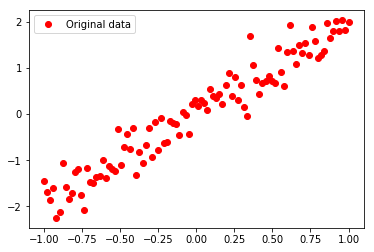

Epoch: 1 cost= 3.0148852 W= [-0.6723305] b= [0.799421]
Epoch: 3 cost= 0.33153048 W= [1.2398233] b= [0.29144213]
Epoch: 5 cost= 0.1100741 W= [1.7588102] b= [0.0960833]
Epoch: 7 cost= 0.094987154 W= [1.8934174] b= [0.04449244]
Epoch: 9 cost= 0.09395725 W= [1.9282303] b= [0.03113429]
Epoch: 11 cost= 0.09388315 W= [1.9372312] b= [0.02768016]
Epoch: 13 cost= 0.09387683 W= [1.939559] b= [0.02678698]
Epoch: 15 cost= 0.09387606 W= [1.9401605] b= [0.02655606]
Epoch: 17 cost= 0.09387592 W= [1.9403161] b= [0.02649635]
Epoch: 19 cost= 0.09387589 W= [1.940356] b= [0.02648103]
 Finished!
cost= 0.093875885 W= [1.9403632] b= [0.02647836]


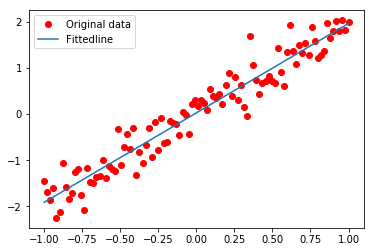

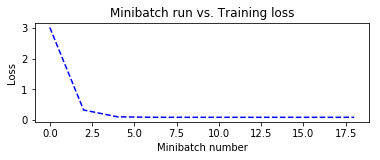

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#定义生成loss可视化的函数
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]
 
#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()
 
tf.reset_default_graph()
 
# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
# 前向结构
z = tf.multiply(X, W)+ b
 
#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义学习参数
training_epochs = 20
display_step = 2
 
saver = tf.train.Saver(max_to_keep=1)                            #生成saver
savedir = "log/"                                    #生成模型的路径
#启动session
with tf.Session() as sess:
    sess.run(init)
    #在这里添加Sess中的训练代码
    #向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print ("Epoch:", epoch+1,"cost=", loss,"W=", sess.run(W),"b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
            saver.save(sess, savedir+"linermodel.cpkt", global_step=epoch)
                    
    print (" Finished!")
    
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b))
#显示模型
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    
    plt.show()

In [11]:
#重启一个session  ，载入检查点  
load_epoch=18    
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, savedir+"linermodel.cpkt-" + str(load_epoch))
    print ("x=0.2, z=", sess2.run(z, feed_dict={X: 0.2}))

INFO:tensorflow:Restoring parameters from log/linermodel.cpkt-18
x=0.2, z= [0.4245097]


上面代码运行完后，会看到在log文件夹下多了几个linermodel.cpkt-18*文件，就是检查点文件。

这里使用tf.train.Saver（max_to_keep=1）代码创建saver时传入的参数max_to_keep=1代表：在迭代过程中只保存一个文件。这样，在循环训练过程中，新生成的模型就会覆盖以前的模型。

注意： 如果觉得通过指定迭代次数比较麻烦，还有一个好方法可以快速获取到检查点文件。示例代码如下：

ckpt = tf.train.get_checkpoint_state(ckpt_dir)

if ckpt and ckpt.model_checkpoint_path:

    saver.restore(sess, ckpt.model_checkpoint_path)

还可以再简洁一些，写成以下这样：

In [22]:
with tf.Session() as sess3:
    sess3.run(tf.global_variables_initializer())
    kpt = tf.train.latest_checkpoint(savedir)
    if kpt!=None:
        saver.restore(sess3, kpt)

INFO:tensorflow:Restoring parameters from log/linermodel.cpkt-18


## 4.1.14　实例12：更简便地保存检查点

本例中介绍另一种更简便地保存检查点功能代码的方法——tf.train.MonitoredTraining Session函数。该函数可以直接实现保存及载入检查点模型的文件。与前面的方式不同，本例中并不是按照循环步数来保存，而是按照训练时间来保存的。通过指定save_checkpoint_secs参数的具体秒数，来设置每训练多久保存一次检查点。

## 实例描述

演示使用MonitoredTrainingSession函数来自动管理检查点文件。具体代码如下：

In [ ]:
#代码4-7　trainMonitored
import tensorflow as tf
tf.reset_default_graph()
global_step = tf.train.get_or_create_global_step()
step = tf.assign_add(global_step, 1)
#设置检查点路径为log/checkpoints
with tf.train.MonitoredTrainingSession(checkpoint_dir='log/checkints',save_checkpoint_secs = 2) as sess:
    print(sess.run([global_step]))
    while not sess.should_stop():                    #启用死循环，当sess不结束时就不停止
        i = sess.run( step)
        print( i)

将程序停止，可以看到log/checkints下面生成了检测点文件model.ckpt-xxxx.meta。再次运行代码，程序自动载入检查点文件是从第xxxx+1次开始运行的。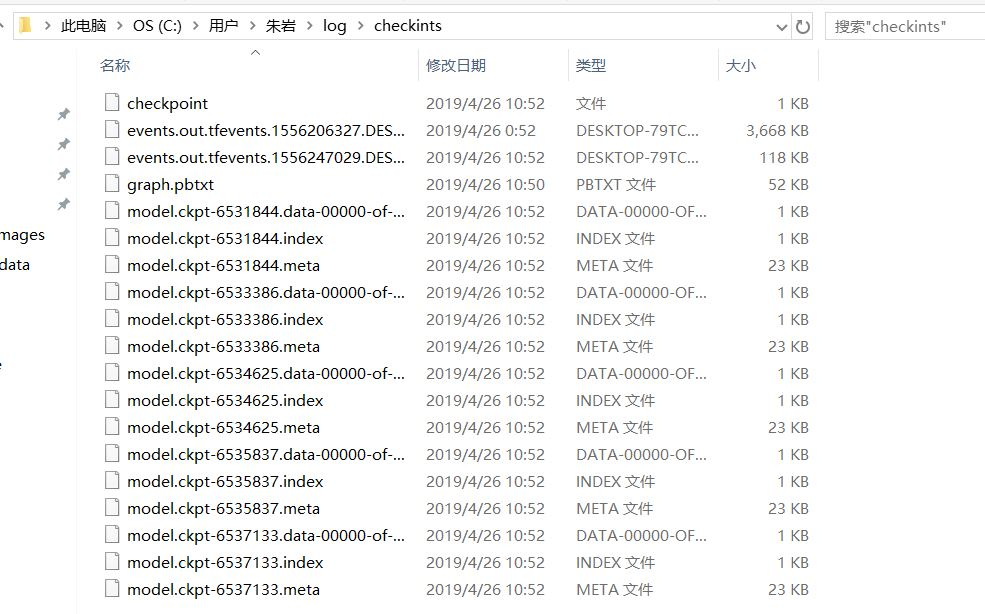

注意： （1）如果不设置save_checkpoint_secs参数，默认的保存时间间隔为10分钟。这种按照时间保存的模式更适用于使用大型数据集来训练复杂模型的情况。

（2）使用该方法时，必须要定义global_step变量，否则会报错误。

## 4.1.15　模型操作常用函数总结

下面将模型操作的相关函数进行系统的介绍，如表4-2所示。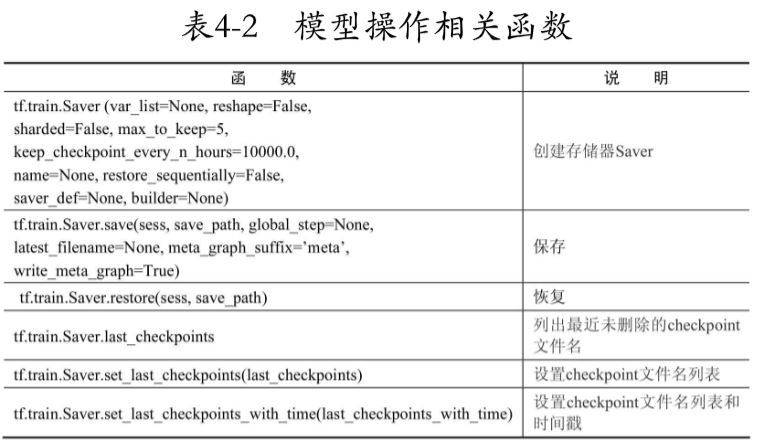

## 4.1.16　TensorBoard可视化介绍

TensorFlow还提供了一个可视化工具TensorBoard。它可以将训练过程中的各种绘制数据展示出来，包括标量（Scalars）、图片（Images）、音频（Audio）、计算图（Graph）、数据分布、直方图（Histograms）和嵌入式向量。可以通过网页来观察模型的结构和训练过程中各个参数的变化。

当然，TensorBoard不会自动把代码展示出来，其实它是一个日志展示系统，需要在session中运算图时，将各种类型的数据汇总并输出到日志文件中。然后启动TensorBoard服务，TensorBoard读取这些日志文件，并开启6006端口提供Web服务，让用户可以在浏览器中查看数据。

TensorFlow提供了一系列API来生成这些数据，具体如表4-3所示。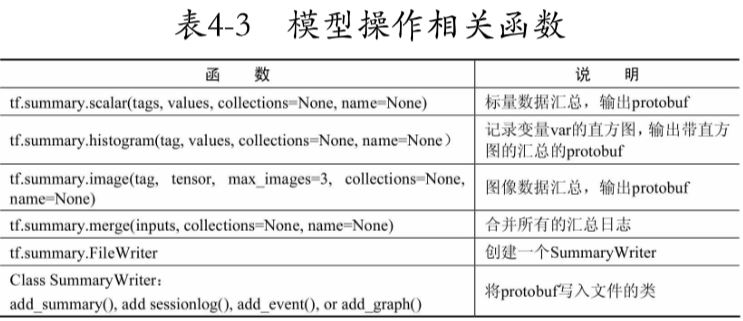
## 4.1.17　实例13：线性回归的TensorBoard可视化

下面举例演示TensorBoard的可视化效果。

## 实例描述

为“3-1线性回归.py”代码文件添加支持输出TensorBoard信息的功能，演示通过TensorBoard来观察训练过程。

本例还是以“3-1线性回归.py”文件的代码为原型，在上面添加支持TensorBoard的功能。该例子中，通过添加一个标量数据和一个直方图数据到log里，然后通过TensorBoard显示出来。代码改动量非常小，第一步加入到summary，第二步写入文件。

将模型的生成值加入到直方图数据中，将损失值加入到标量数据中，代码如下：

In [20]:
#代码4-8　线性回归的TensorBoard可视化
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3
 
# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# 前向结构
z = tf.multiply(X, W)+ b
tf.summary.histogram('z',z)
#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
tf.summary.scalar('loss_function', cost)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

给直方图起名仍然叫z，标量的名字叫loss_function。
下面的代码是在启动session之后加入代码，创建一个summary_writer，在迭代中将summary的值运行生成出来，同时添加到文件里。

In [ ]:
#代码4-8　线性回归的TensorBoard可视化（续）
# 初始化所有变量
init = tf.global_variables_initializer() 
# 定义参数
trainning_epochs = 20
display_step = 2 
# 启动session
with tf.Session() as sess:    
    sess.run(init)    
    plotdata = {"batchsize":[], "loss":[]}    
    # 合并所有summary    
    merged_summary_op = tf.summary.merge_all()    
    # 创建summary_writter 用于写文件    
    summary_writter = tf.summary.FileWriter('log/mnist_with_summaries', sess.graph)
    # 存放批次值和损失值    
    # 向模型输入数据    
    for epoch in range(trainning_epochs):        
        for(x, y) in zip(train_X, train_Y):            
            sess.run(optimizer, feed_dict={X:x, Y:y})   
            
        summary_str = sess.run(merged_summary_op, feed_dict={X: x, Y: y})        
        summary_writter.add_summary(summary_str, epoch)         # 将summary写入文件      

运行代码，显示的内容和以前一样没什么变化，来到生成的路径下可以看到多了一个文件，下图所示。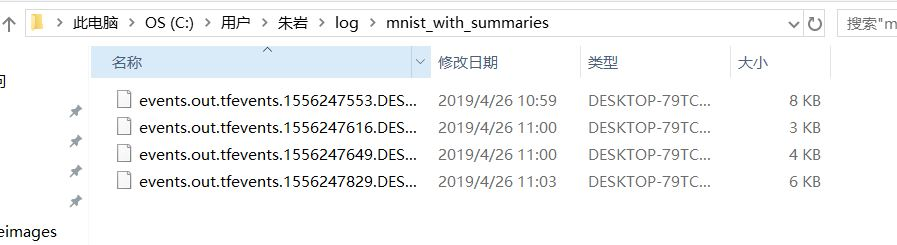

然后单击“开始”|“运行”，输入cmd，启动“命令行”窗口。首先来到summary日志的上级路径下，输入如下命令：

tensorboard --logdir D:\spyder.data\log\mnist_with_summaries结果下图所示。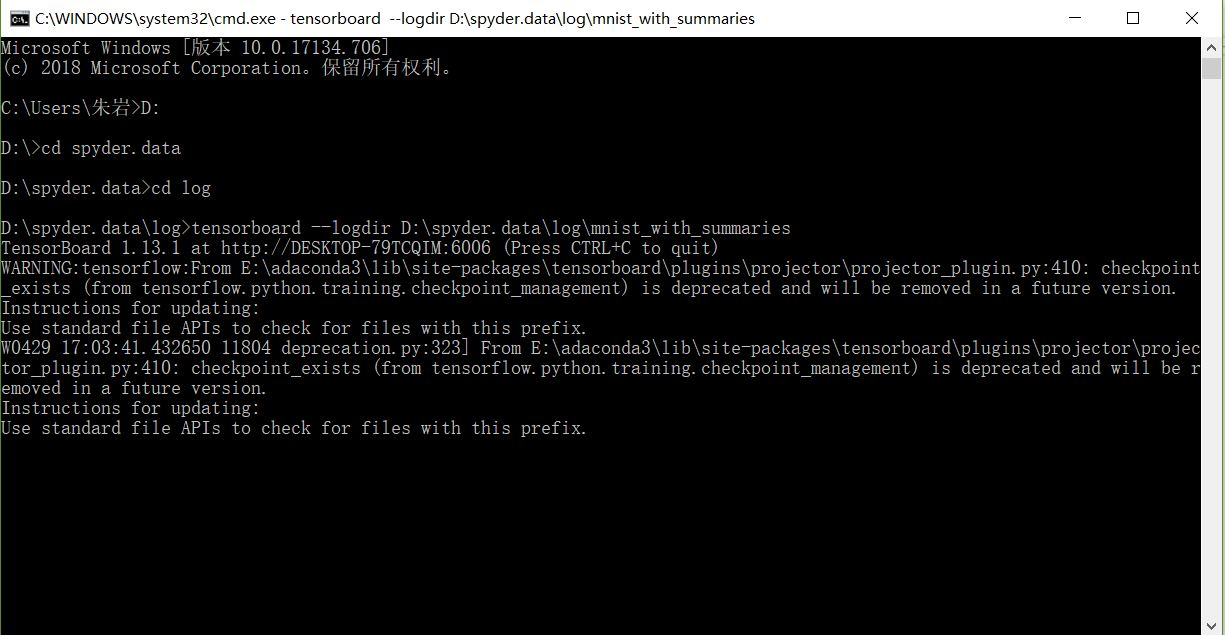
接着打开浏览器，输入 http://DESKTOP-79TCQIM:6006 ，会看到如图下图所示界面。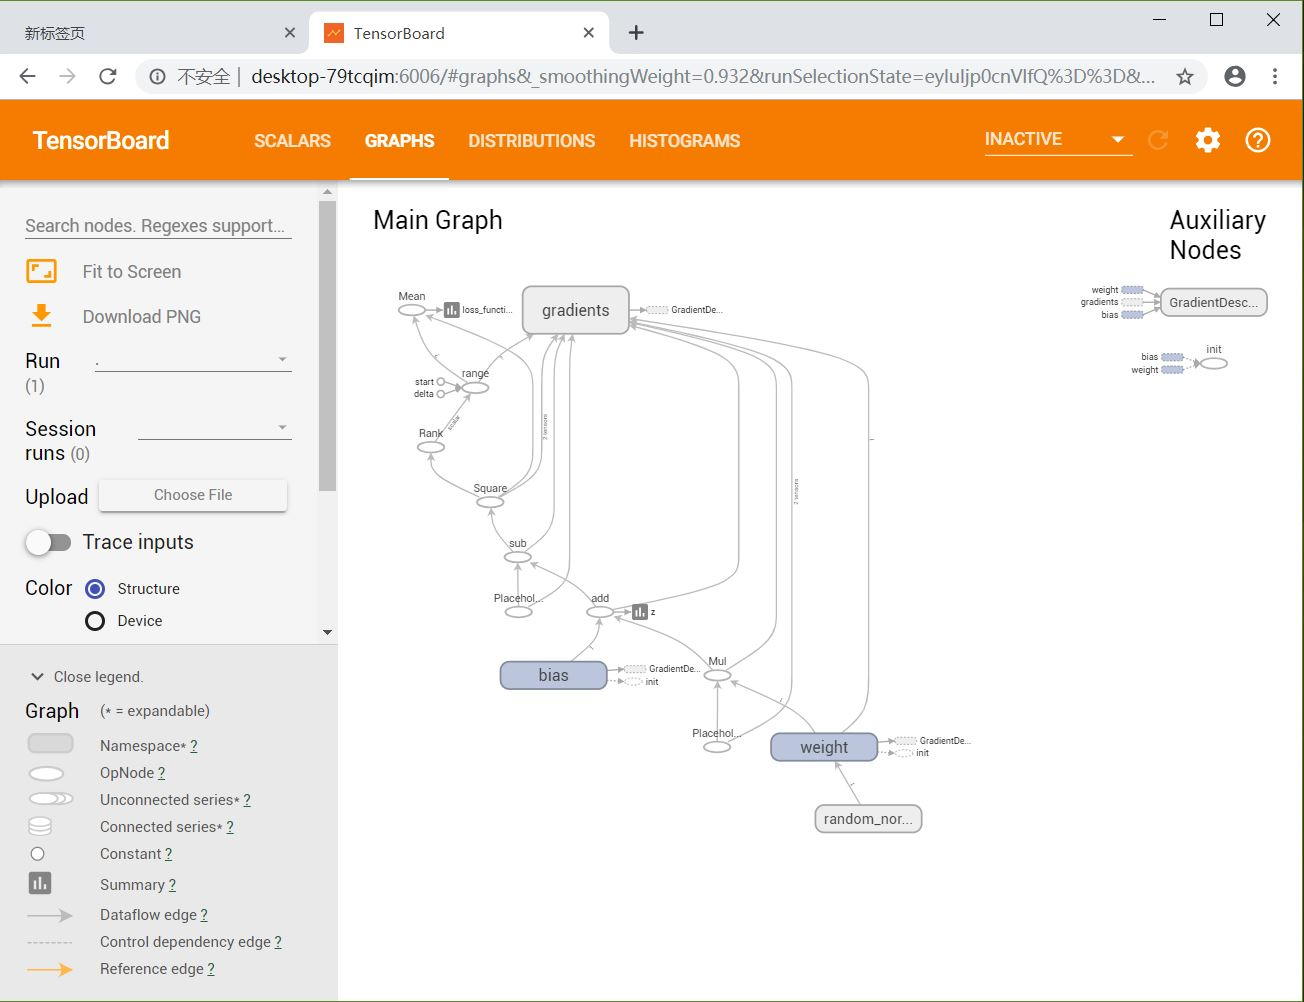
单击SCALARS，会看到之前创建的loss_fuction。这个loss_fuction也是可以点开的，点开后可以看到损失值随迭代次数的变化情况，如下图所示。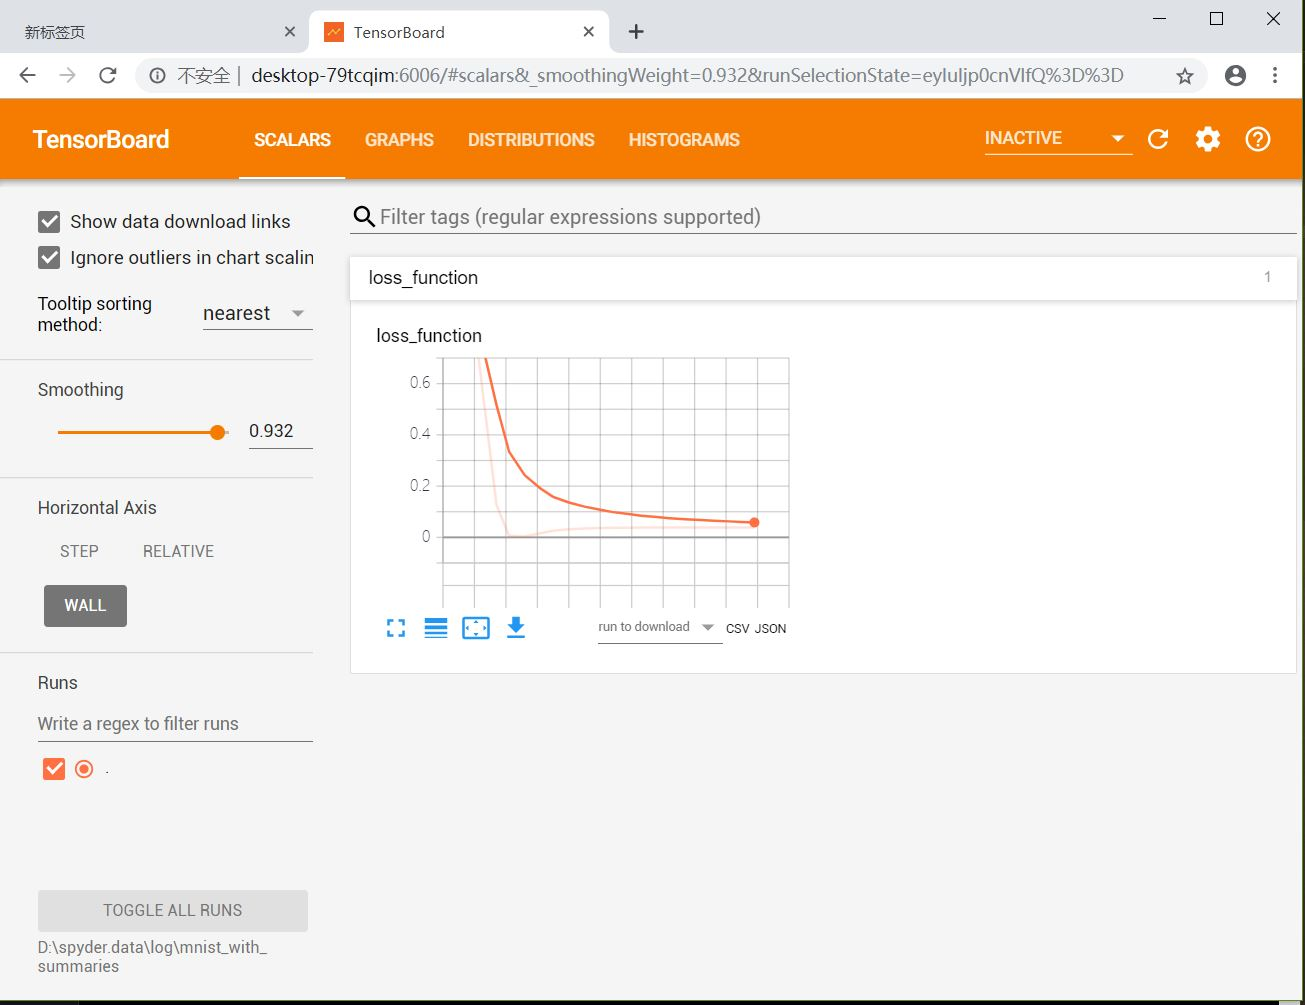
在上图中可以调节平滑数来改变右边标量的曲线。类似的还可以点GRAPHS看看神经网络的内部结构，还可以点开HISTOGRAMS来看例子中的另一个显示值z。

注意： 在显示TensorBoard界面的过程中，下面两点需要强调一下。

·浏览器最好要使用Chrome。

·在命令行里启动TensorBoard时，一定要先进入到日志所在的上级路径下，否则打开的页面里找不到创建好的信息。

# 4.2　TensorFlow基础类型定义及操作函数介绍

下面介绍TensorFlow的基础类型、基础函数。这部分学完，读者将会对TensorFlow的基础语法有了系统的了解，为后面学习写代码或读代码扫清障碍。

本节表格中的示例代码前面默认都有以下代码。

代码中的tf代表tensorflow库，np代表numpy库。

## 4.2.1　张量及操作

张量可以说是TensorFlow的标志，因为整个框架的名称TensorFlow就是张量流的意思。下面来一起全面地认识一下张量。

## 1．张量介绍

TensorFlow程序使用tensor数据结构来代表所有的数据。计算图中，操作间传递的数据都是Tensor。可以把tensor看为一个n维的数组或列表，每个tensor中包含了类型（type）、阶（rank）和形状（shape）。

（1）tensor类型

为了方便理解，这里将tensor的类型与Python的类型放在一起做个比较，如表4-4所示。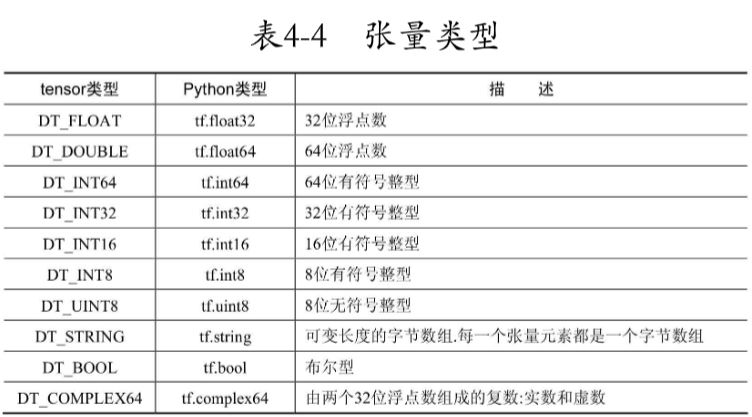
（2）rank（阶）

rank（阶）指的就是维度。但张量的阶和矩阵的阶并不是同一个概念，主要是看有几层中括号。例如，对于一个传统意义上的3阶矩阵a=[[1，2，3]，[4，5，6]，[7，8，9]]来讲，在张量中的阶数表示为2阶（因为它有两层中括号）。表4-5列出了标量、向量、矩阵的阶数。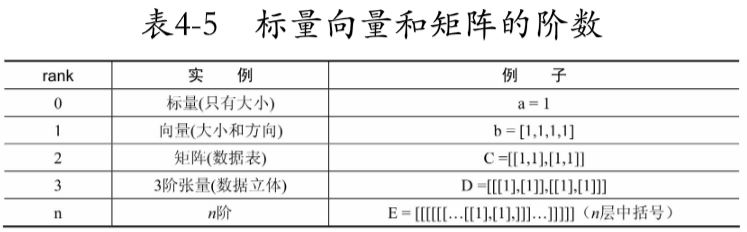
（3）shape（形状）

shape（形状）用于描述张量内部的组织关系。“形状”可以通过Python中的整数列表或元组（int list或tuples）来表示，也可以用TensorFlow中的相关形状函数来表示。

举例：一个二阶张量a=[[1，2，3]，[4，5，6]]形状是两行三列，描述为（2，3）。

## 2．张量相关操作

张量的相关操作包括类型转换、数值操作、形状变换和数据操作。

（1）类型转换

类型转换的相关函数如表4-6所示。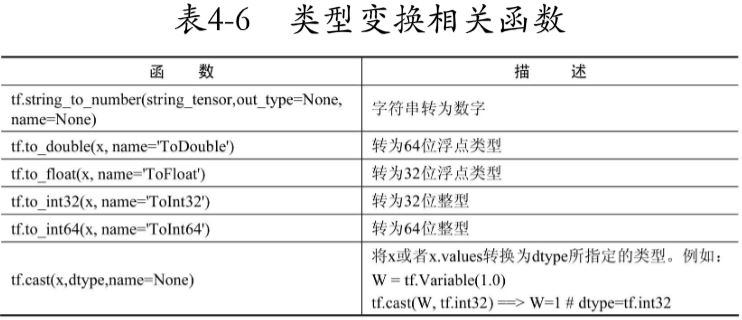
（2）数值操作

数值操作的相关函数如表4-7所示。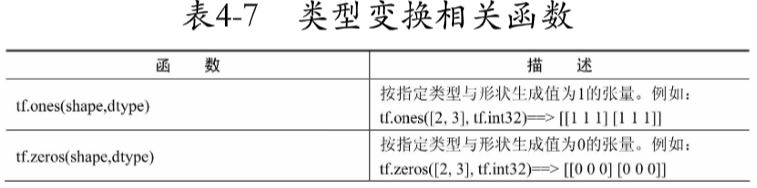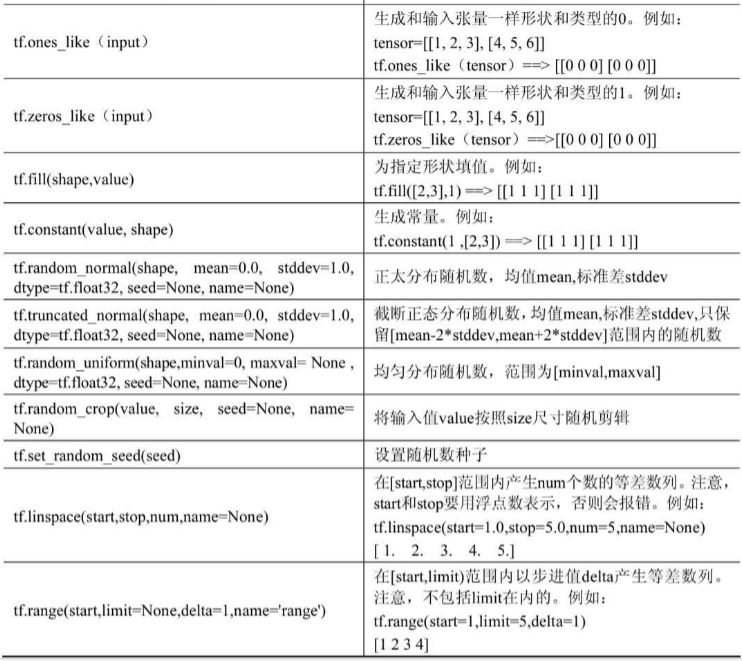
（3）形状变换

形状变换的相关函数如表4-8所示。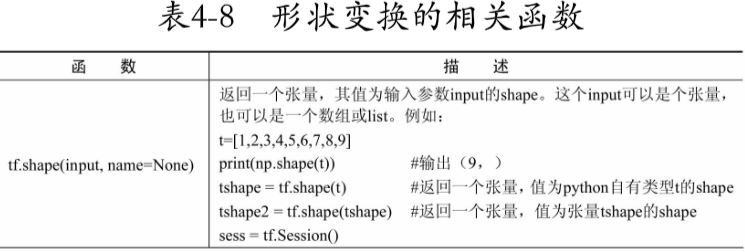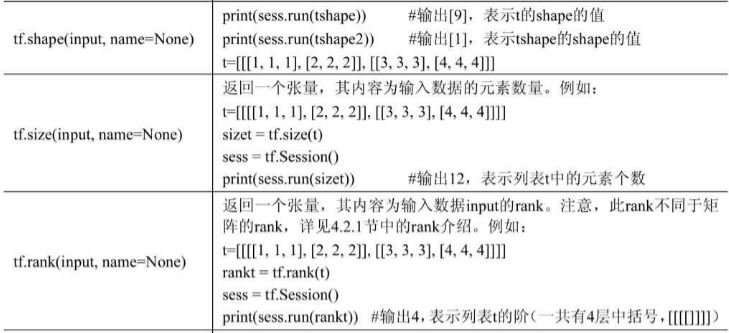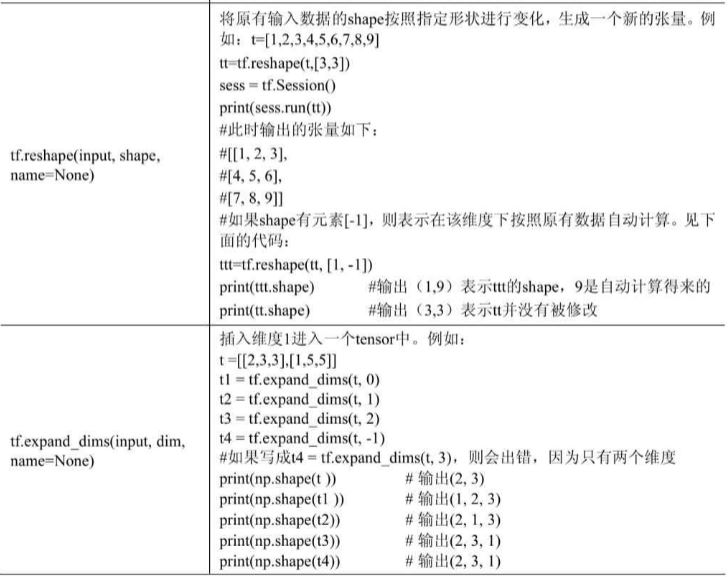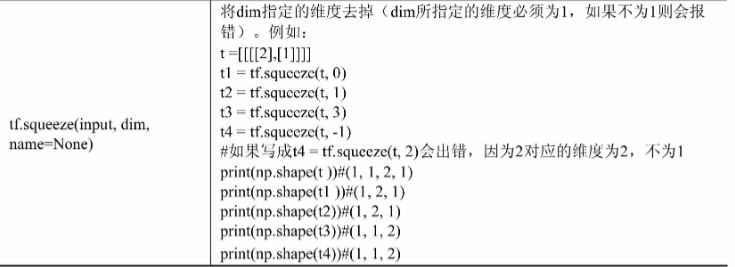
（4）数据操作

数据操作的相关函数如表4-9所示。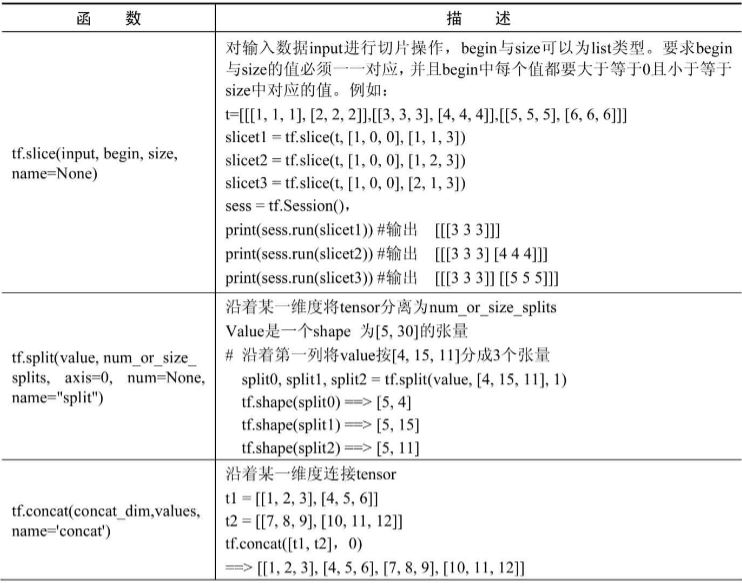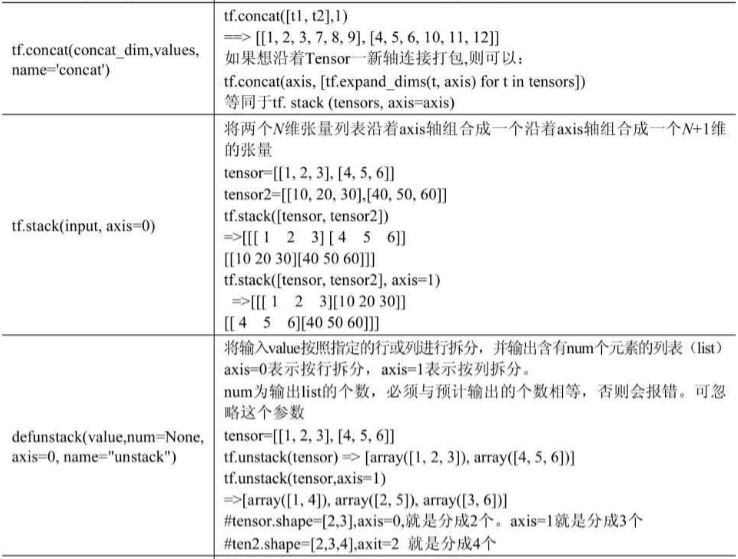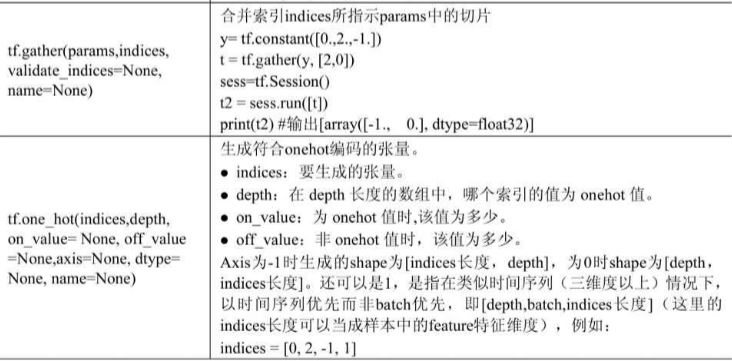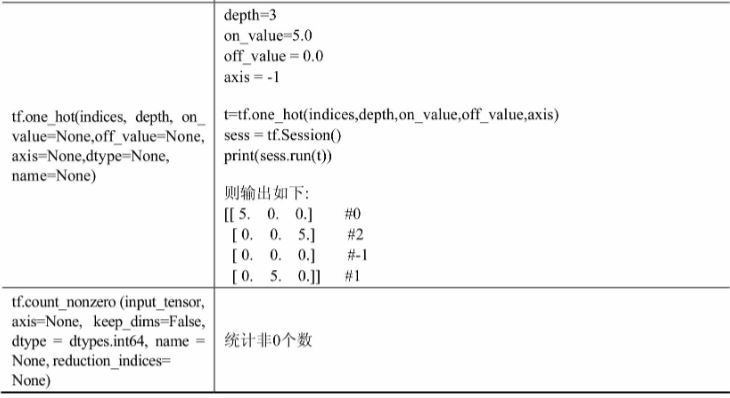
注意： TensorFlow开头的代码都不能直接运行，必须放到session里面才可以。例如：

In [16]:
import numpy as np
import tensorflow as tf 

x = tf.constant(2)
y = tf.constant(5)
def f1(): return tf.multiply(x, 17)
def f2(): return tf.add(y, 23)
r = tf.cond(tf.less(x, y), f1, f2)
print(r) #这样是错的

#生成两行三列的张量，值为1
with tf.Session() as sess:
    print(sess.run( r  )) #这样才可以

Tensor("cond/Merge:0", shape=(), dtype=int32)
34


## 4.2.2　算术运算函数

如表4-10中列出了TensorFlow关于算术运算方面的函数。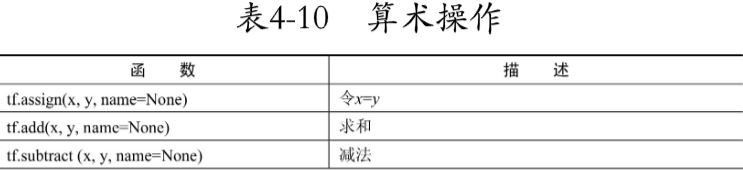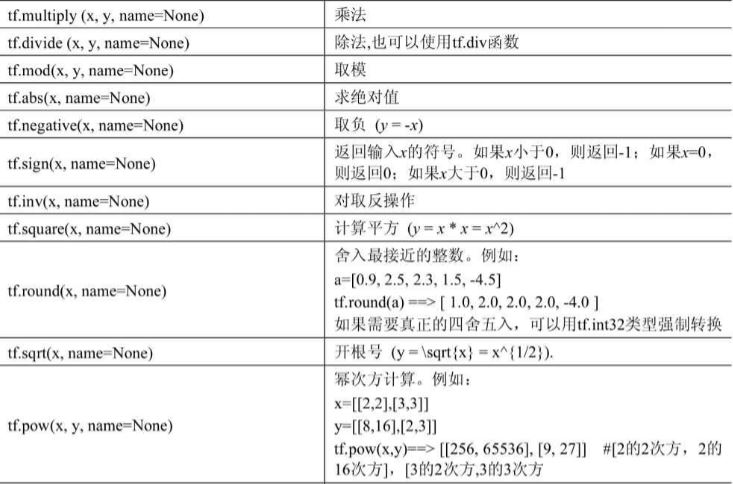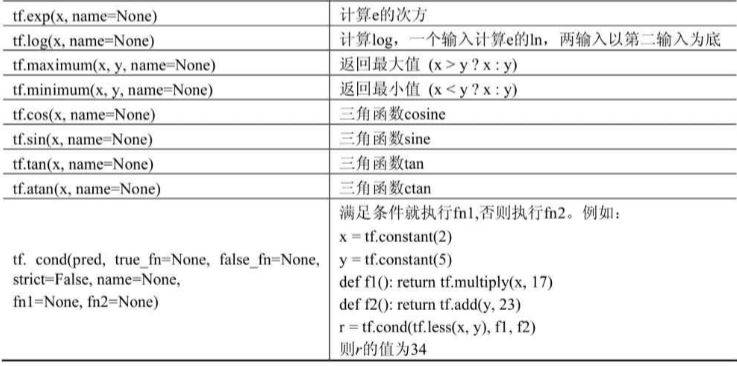

## 4.2.3　矩阵相关的运算

矩阵相关的操作函数如表4-11所示。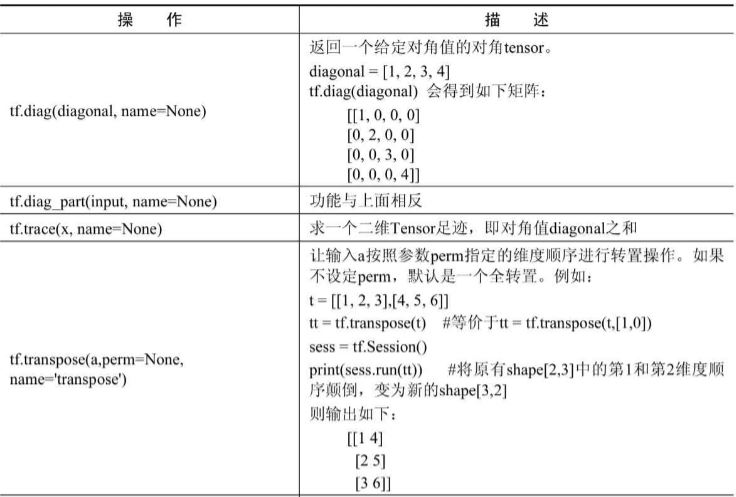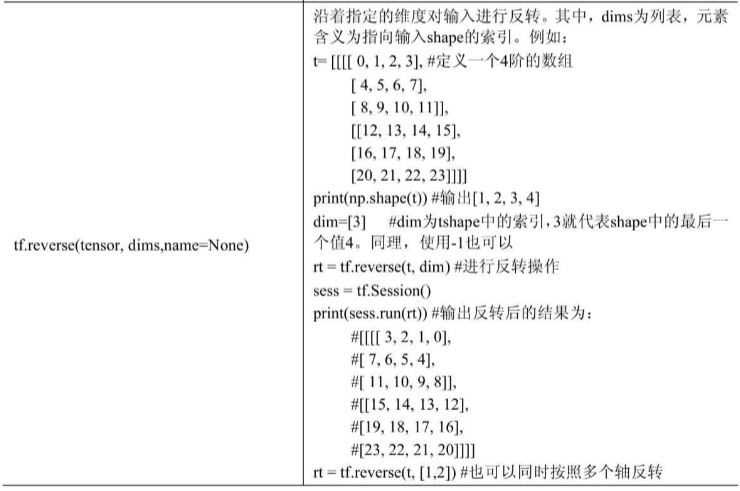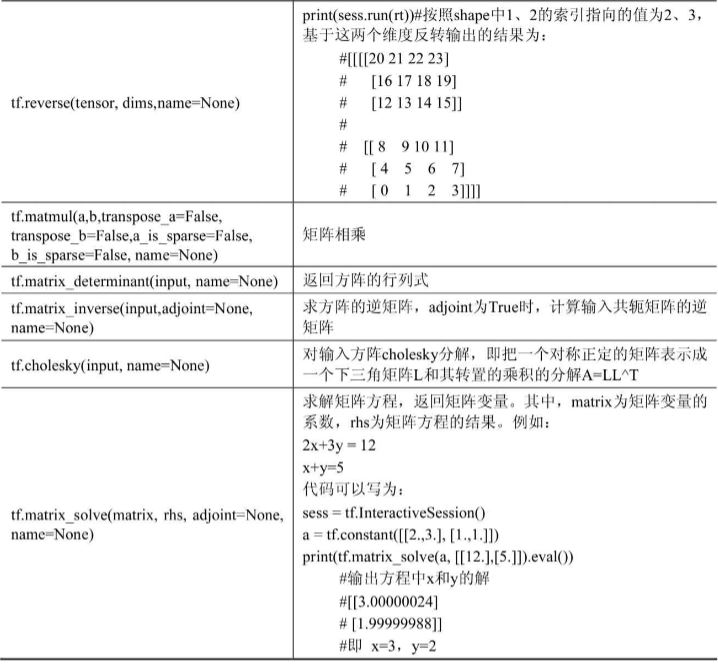

## 4.2.4　复数操作函数

关于复数的操作函数如表4-12所示。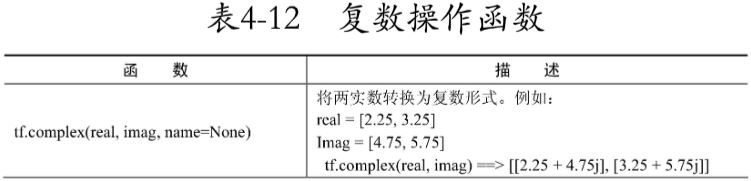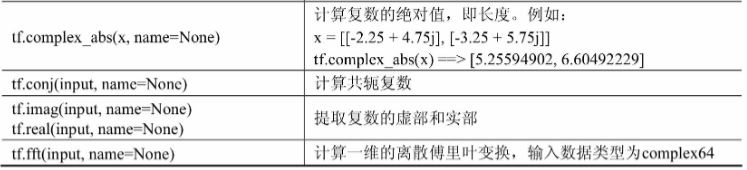

## 4.2.5　规约计算

规约计算的操作都会有降维的功能，在所有reduce_xxx系列操作函数中，都是以xxx的手段降维，每个函数都有axis这个参数，即沿某个方向，使用xxx方法对输入的Tensor进行降维。

 提示： axis的默认值是None，即把input_tensor降到0维，即一个数。对于二维input_tensor而言：axis=0，则按列计算；axis=1，则按行计算。参数reduction_indices是为了兼容以前的版本与axis保证相同的含义。如表4-13所示为规约计算函数及其说明。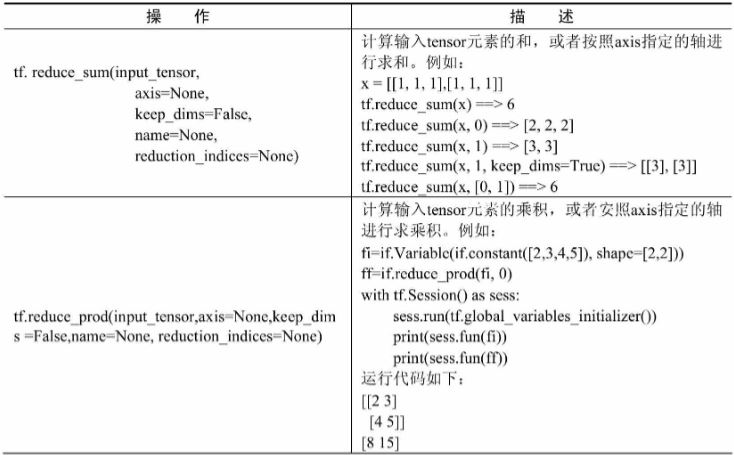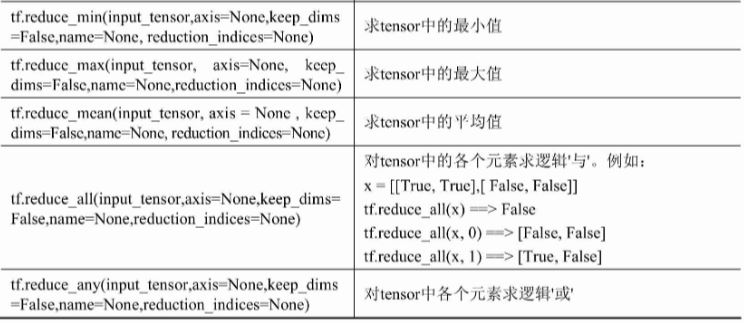
 
## 4.2.6　分割

分割操作是TensorFlow不常用的操作，在复杂的网络模型里偶尔才会用到。如表4-14所示为分割操作的相关函数。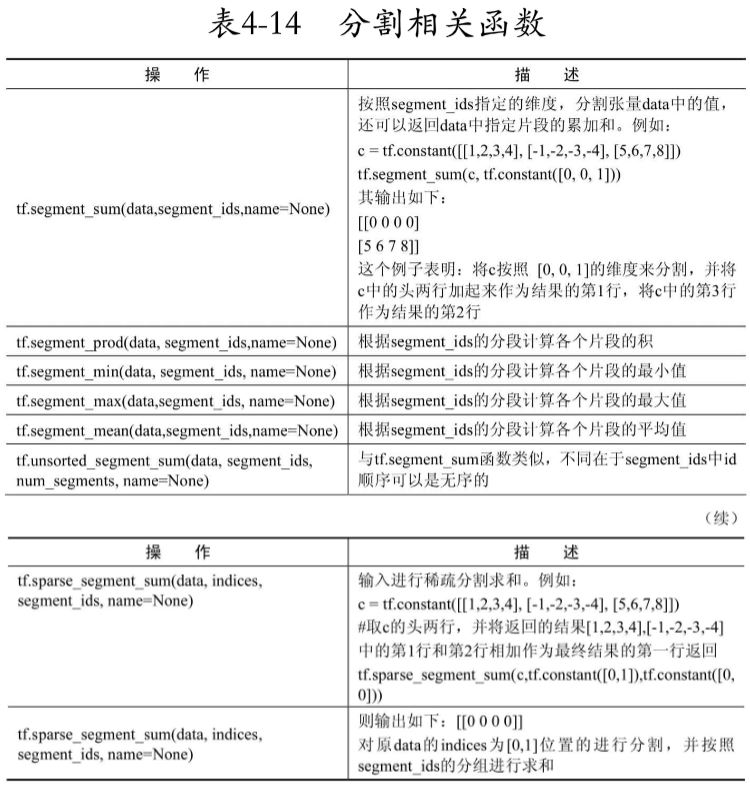

## 4.2.7　序列比较与索引提取

对于序列和数组的操作，是本书中常用的方法，具体的函数如表4-15所示。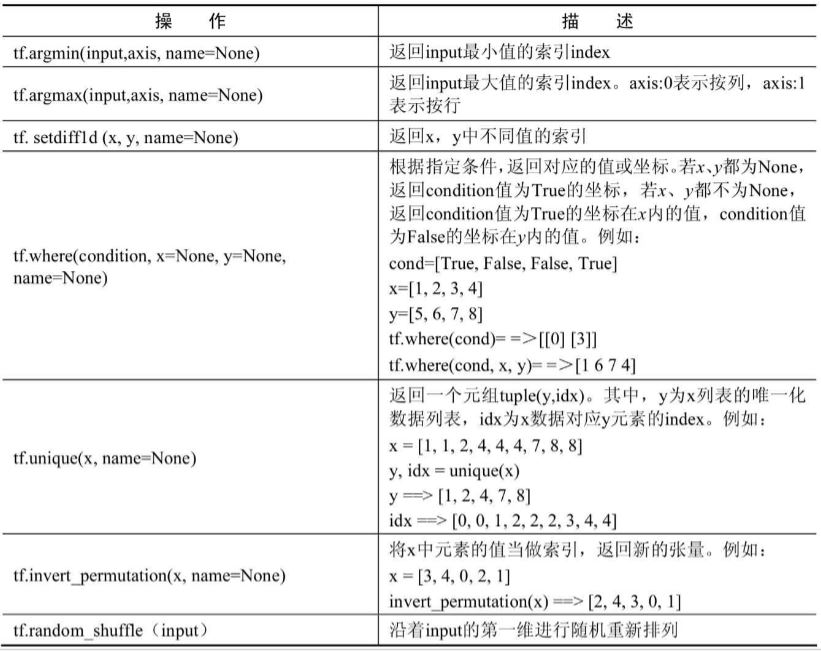

## 4.2.8　错误类

作为一个完整的框架，有它自己的错误处理。TensorFlow中的错误类如表4-16所示，该部分不常用，可以作为工具，使用时查询一下即可。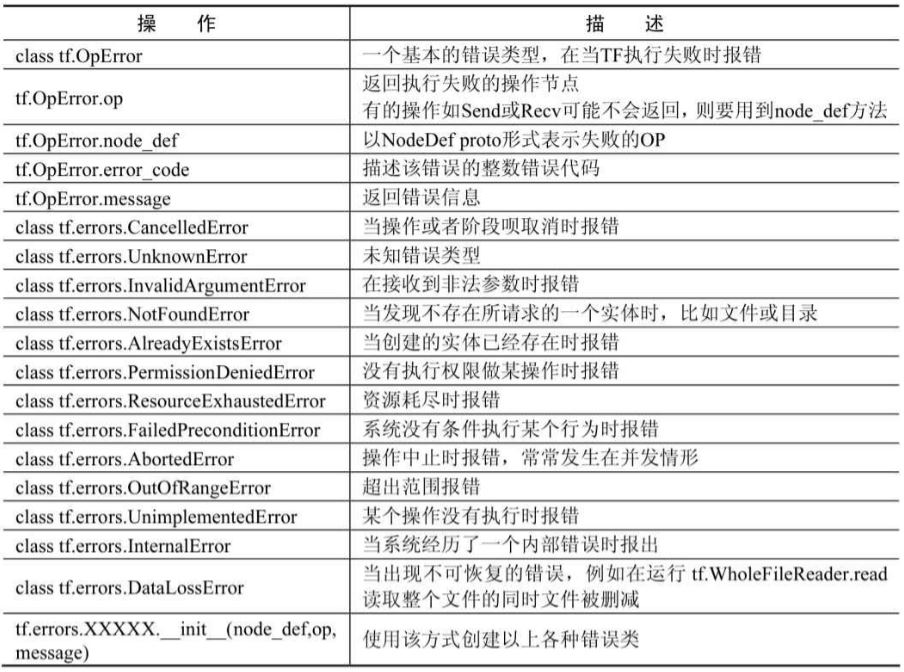